In [10]:
"""
data_loader.py
==============
Data loading and initial inspection functionality
"""

import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')

class DataLoader:
    def __init__(self, data_path):
        """Initialize DataLoader with dataset path"""
        self.data_path = data_path
        self.df = None
        
    def load_and_inspect_data(self):
        """Load dataset and perform initial inspection"""
        print("="*70)
        print("LOADING AND INSPECTING DEVICE PRIORITY DATASET")
        print("="*70)
        
        # Load data
        self.df = pd.read_csv(self.data_path)
        
        print(f"Dataset Shape: {self.df.shape}")
        print(f"Memory Usage: {self.df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
        
        # Basic info
        print(f"\nDataset Info:")
        print(self.df.info())
        
        # First few rows
        print(f"\nFirst 5 rows:")
        print(self.df.head())
        
        # Data types
        print(f"\nData Types:")
        print(self.df.dtypes)
        
        return self.df
    
    def data_quality_assessment(self):
        """Comprehensive data quality check"""
        print("\n" + "="*70)
        print("DATA QUALITY ASSESSMENT")
        print("="*70)
        
        # Missing values
        print("\nMissing Values Analysis:")
        missing_data = self.df.isnull().sum()
        missing_percent = (missing_data / len(self.df)) * 100
        
        if missing_data.sum() == 0:
            print("✓ No missing values detected!")
        else:
            missing_df = pd.DataFrame({
                'Missing Count': missing_data,
                'Percentage': missing_percent
            }).sort_values('Missing Count', ascending=False)
            print(missing_df[missing_df['Missing Count'] > 0])
        
        # Duplicates
        duplicates = self.df.duplicated().sum()
        print(f"\nDuplicate Rows: {duplicates} ({duplicates/len(self.df)*100:.2f}%)")
        
        # Unique values for categorical columns
        print("\nCategorical Features Analysis:")
        categorical_cols = ['deviceType', 'deviceName', 'deviceLocation', 'currentBandwidth', 'bandwidthFreq']
        for col in categorical_cols:
            if col in self.df.columns:
                unique_count = self.df[col].nunique()
                print(f"  {col}: {unique_count} unique values")
                print(f"    Distribution: {dict(self.df[col].value_counts().head())}")
        
        # Numerical features summary
        print("\nNumerical Features Summary:")
        numerical_cols = ['deviceLatency', 'deviceJitter', 'devicePacketLoss', 'deviceMOSScore', 'rssi']
        for col in numerical_cols:
            if col in self.df.columns:
                print(f"  {col}: min={self.df[col].min()}, max={self.df[col].max()}, "
                     f"mean={self.df[col].mean():.2f}, std={self.df[col].std():.2f}")
        
        return {
            'missing_values': missing_data,
            'duplicates': duplicates,
            'shape': self.df.shape,
            'memory_usage_mb': self.df.memory_usage(deep=True).sum() / 1024**2
        }
    
    def get_data(self):
        """Return the loaded dataset"""
        return self.df


# Example usage
if __name__ == "__main__":
    loader = DataLoader("/Users/nethrashri/Desktop/Work/Device_Prioritization_23rd_July/Device_Prioritization_V2/device_priority_dataset.csv")
    data = loader.load_and_inspect_data()
    quality_report = loader.data_quality_assessment()

LOADING AND INSPECTING DEVICE PRIORITY DATASET
Dataset Shape: (10000, 15)
Memory Usage: 5.26 MB

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                10000 non-null  object 
 1   timestamp         10000 non-null  int64  
 2   hourOfTheDay      10000 non-null  int64  
 3   dayOfTheWeek      10000 non-null  int64  
 4   deviceType        10000 non-null  object 
 5   deviceName        10000 non-null  object 
 6   mac               10000 non-null  object 
 7   deviceLatency     10000 non-null  int64  
 8   deviceJitter      10000 non-null  int64  
 9   devicePacketLoss  10000 non-null  int64  
 10  deviceMOSScore    10000 non-null  float64
 11  deviceLocation    10000 non-null  object 
 12  rssi              10000 non-null  int64  
 13  currentBandwidth  10000 non-null  object 
 14  bandwidthFreq     10000 

In [9]:
import os
print("Current Working Directory:", os.getcwd())


Current Working Directory: /Users/nethrashri/Desktop/Work/Device_Prioritization_23rd_July/Device_Prioritization_V2


In [13]:
## Data Visulization

import os
os.getcwd()


'/Users/nethrashri/Desktop/Work/Device_Prioritization_23rd_July/Device_Prioritization_V2'


COMPREHENSIVE EXPLORATORY DATA ANALYSIS


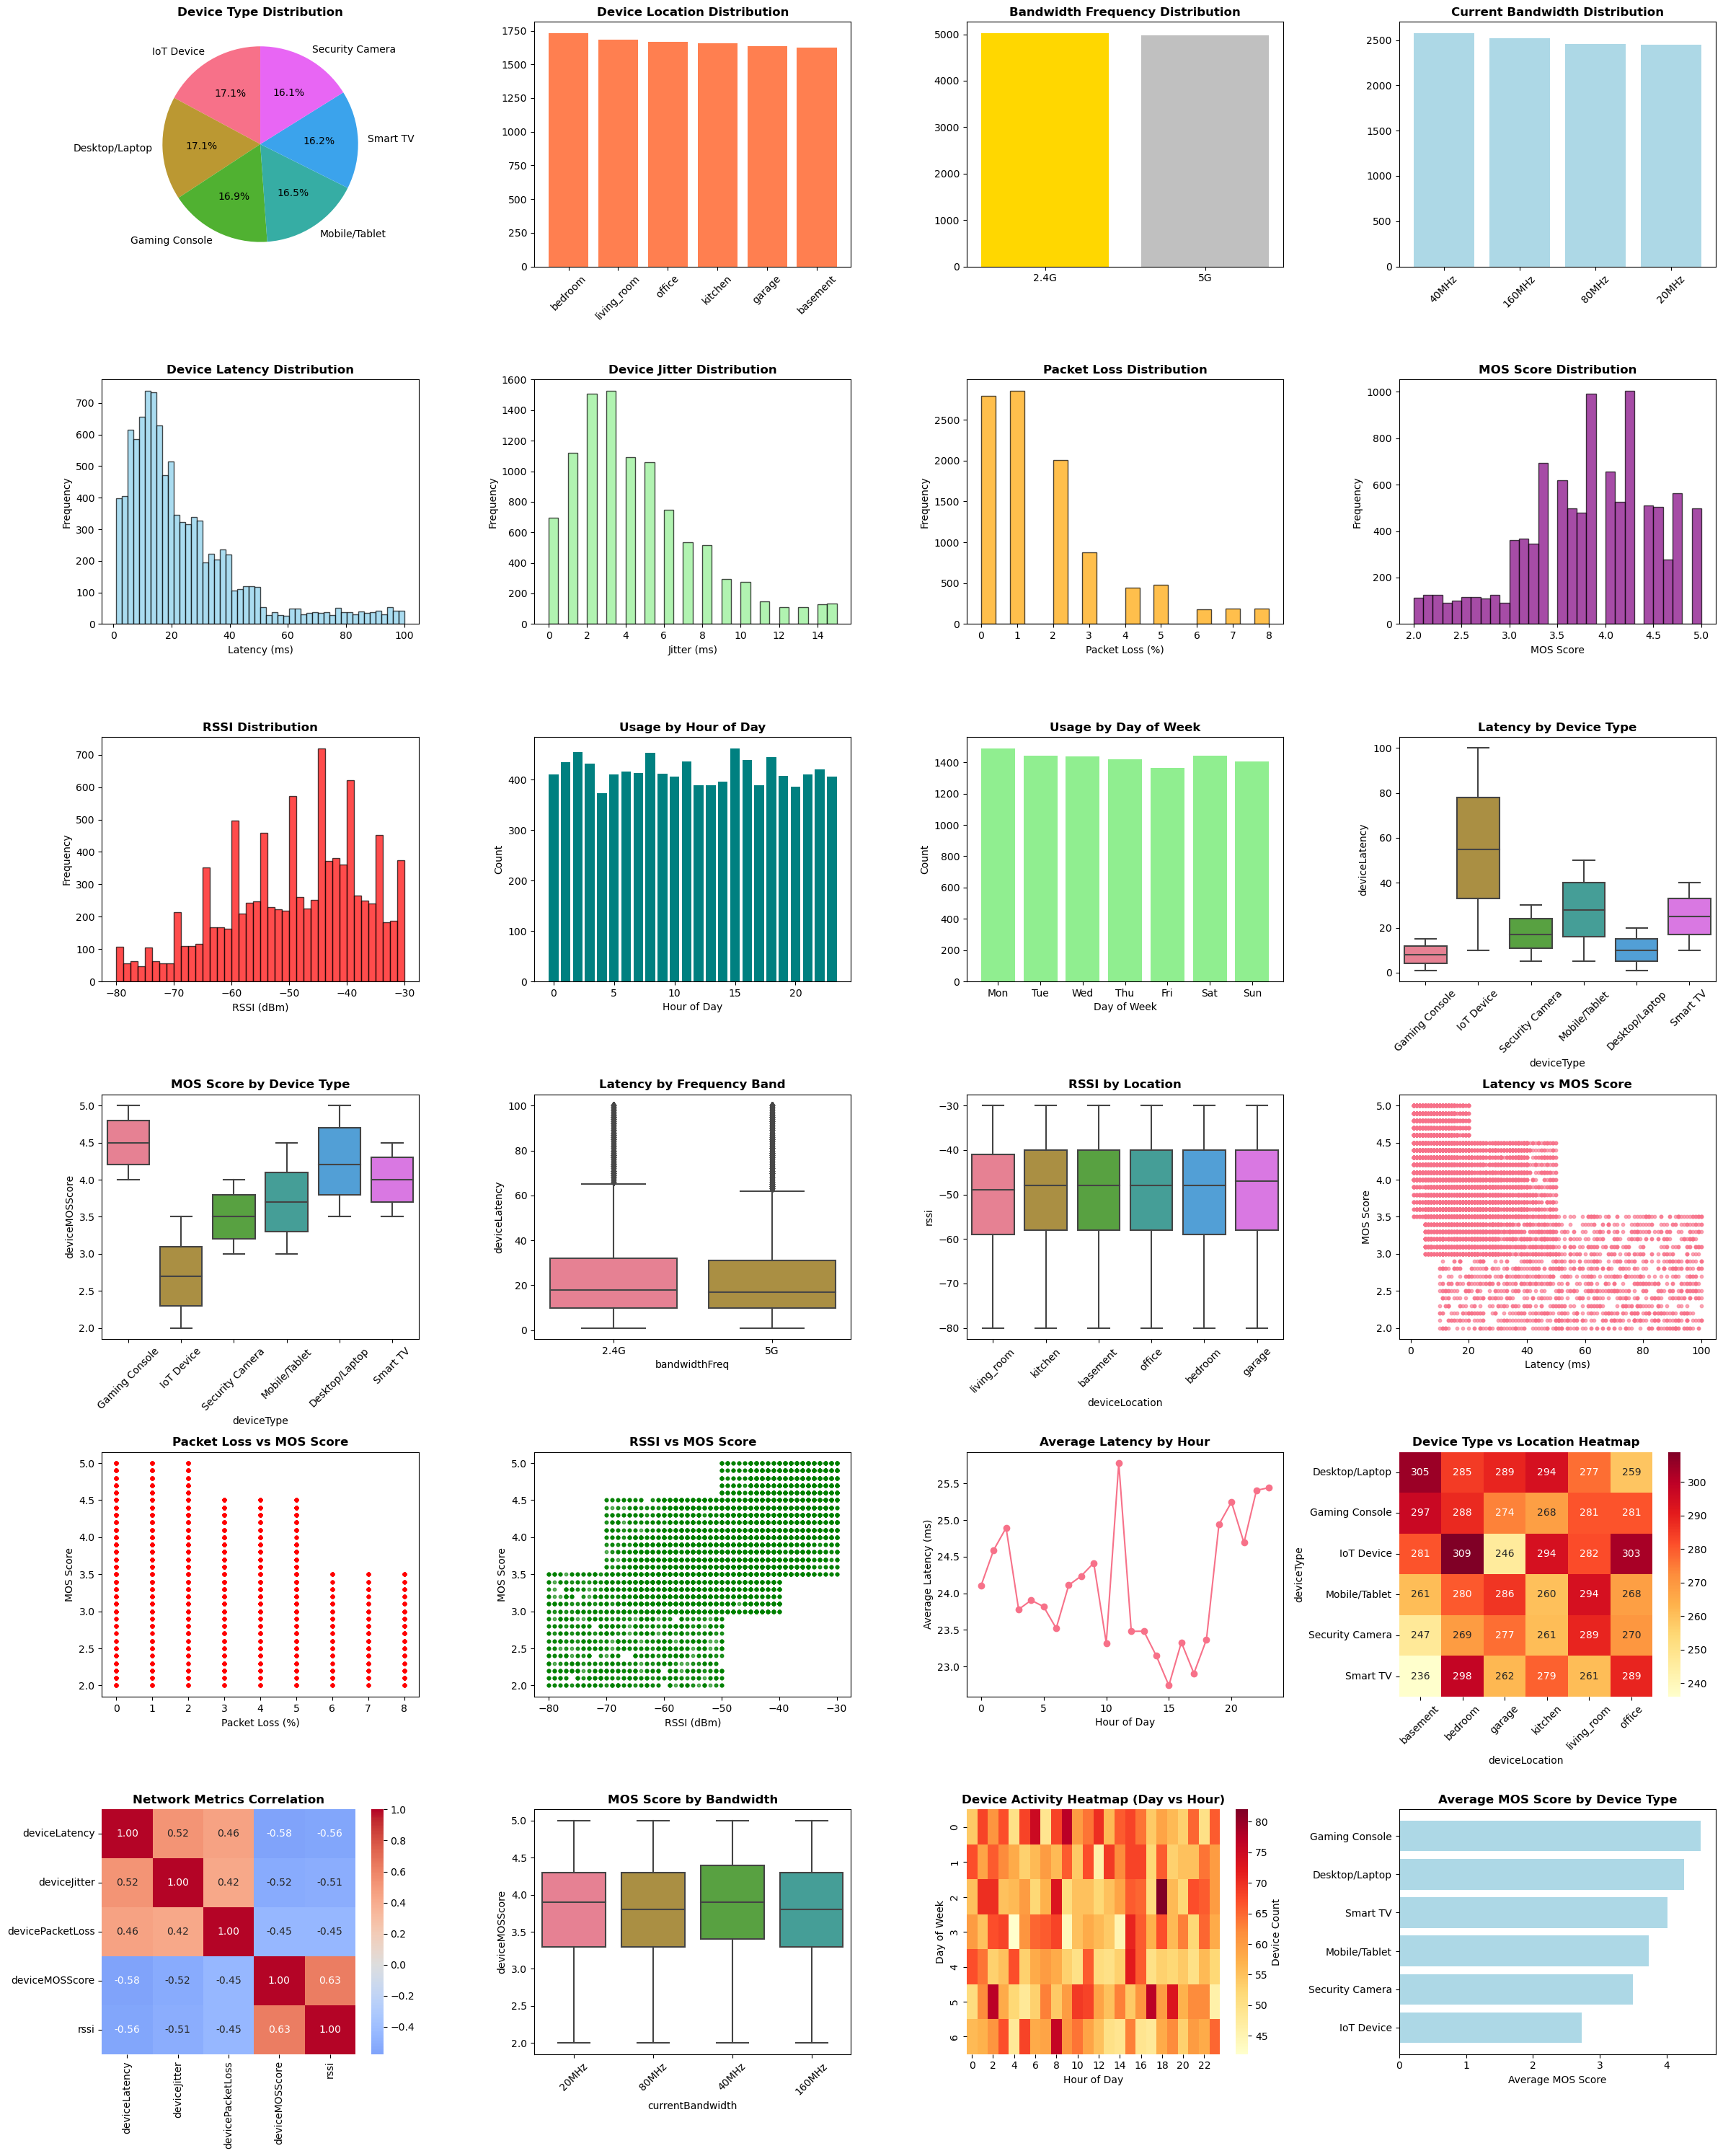


Statistical Summary:
          timestamp  hourOfTheDay  dayOfTheWeek  deviceLatency  deviceJitter  \
count  1.000000e+04  10000.000000  10000.000000   10000.000000  10000.000000   
mean   1.752398e+12     11.440300      2.967500      24.113100      4.435100   
std    7.473798e+08      6.926603      2.009191      20.888144      3.374422   
min    1.751104e+12      0.000000      0.000000       1.000000      0.000000   
25%    1.751749e+12      5.000000      1.000000      10.000000      2.000000   
50%    1.752402e+12     11.000000      3.000000      18.000000      4.000000   
75%    1.753046e+12     17.000000      5.000000      31.000000      6.000000   
max    1.753696e+12     23.000000      6.000000     100.000000     15.000000   

       devicePacketLoss  deviceMOSScore          rssi  
count      10000.000000    10000.000000  10000.000000  
mean           1.754300        3.786610    -49.579200  
std            1.861579        0.704241     12.007329  
min            0.000000        2.

In [14]:
"""
eda_visualizer.py
=================
Comprehensive visualization and exploratory data analysis
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
plt.style.use('default')
sns.set_palette("husl")

class EDAVisualizer:
    def __init__(self, dataframe):
        """Initialize EDA Visualizer with dataframe"""
        self.df = dataframe
        
    def comprehensive_eda(self):
        """Perform comprehensive exploratory data analysis"""
        print("\n" + "="*70)
        print("COMPREHENSIVE EXPLORATORY DATA ANALYSIS")
        print("="*70)
        
        # Create comprehensive visualization
        fig = plt.figure(figsize=(24, 30))
        
        # 1. Device Type Distribution
        plt.subplot(6, 4, 1)
        device_counts = self.df['deviceType'].value_counts()
        plt.pie(device_counts.values, labels=device_counts.index, autopct='%1.1f%%', startangle=90)
        plt.title('Device Type Distribution', fontsize=12, fontweight='bold')
        
        # 2. Device Location Distribution
        plt.subplot(6, 4, 2)
        location_counts = self.df['deviceLocation'].value_counts()
        plt.bar(location_counts.index, location_counts.values, color='coral')
        plt.title('Device Location Distribution', fontsize=12, fontweight='bold')
        plt.xticks(rotation=45)
        
        # 3. Bandwidth Frequency Distribution
        plt.subplot(6, 4, 3)
        freq_counts = self.df['bandwidthFreq'].value_counts()
        plt.bar(freq_counts.index, freq_counts.values, color=['gold', 'silver'])
        plt.title('Bandwidth Frequency Distribution', fontsize=12, fontweight='bold')
        
        # 4. Current Bandwidth Distribution
        plt.subplot(6, 4, 4)
        bandwidth_counts = self.df['currentBandwidth'].value_counts()
        plt.bar(range(len(bandwidth_counts)), bandwidth_counts.values, color='lightblue')
        plt.title('Current Bandwidth Distribution', fontsize=12, fontweight='bold')
        plt.xticks(range(len(bandwidth_counts)), bandwidth_counts.index, rotation=45)
        
        # 5. Device Latency Distribution
        plt.subplot(6, 4, 5)
        plt.hist(self.df['deviceLatency'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
        plt.title('Device Latency Distribution', fontsize=12, fontweight='bold')
        plt.xlabel('Latency (ms)')
        plt.ylabel('Frequency')
        
        # 6. Device Jitter Distribution
        plt.subplot(6, 4, 6)
        plt.hist(self.df['deviceJitter'], bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
        plt.title('Device Jitter Distribution', fontsize=12, fontweight='bold')
        plt.xlabel('Jitter (ms)')
        plt.ylabel('Frequency')
        
        # 7. Packet Loss Distribution
        plt.subplot(6, 4, 7)
        plt.hist(self.df['devicePacketLoss'], bins=20, alpha=0.7, color='orange', edgecolor='black')
        plt.title('Packet Loss Distribution', fontsize=12, fontweight='bold')
        plt.xlabel('Packet Loss (%)')
        plt.ylabel('Frequency')
        
        # 8. MOS Score Distribution
        plt.subplot(6, 4, 8)
        plt.hist(self.df['deviceMOSScore'], bins=30, alpha=0.7, color='purple', edgecolor='black')
        plt.title('MOS Score Distribution', fontsize=12, fontweight='bold')
        plt.xlabel('MOS Score')
        plt.ylabel('Frequency')
        
        # 9. RSSI Distribution
        plt.subplot(6, 4, 9)
        plt.hist(self.df['rssi'], bins=40, alpha=0.7, color='red', edgecolor='black')
        plt.title('RSSI Distribution', fontsize=12, fontweight='bold')
        plt.xlabel('RSSI (dBm)')
        plt.ylabel('Frequency')
        
        # 10. Hour of Day Distribution
        plt.subplot(6, 4, 10)
        hour_counts = self.df['hourOfTheDay'].value_counts().sort_index()
        plt.bar(hour_counts.index, hour_counts.values, color='teal')
        plt.title('Usage by Hour of Day', fontsize=12, fontweight='bold')
        plt.xlabel('Hour of Day')
        plt.ylabel('Count')
        
        # 11. Day of Week Distribution
        plt.subplot(6, 4, 11)
        dow_counts = self.df['dayOfTheWeek'].value_counts().sort_index()
        day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
        plt.bar(range(7), [dow_counts.get(i, 0) for i in range(7)], color='lightgreen')
        plt.title('Usage by Day of Week', fontsize=12, fontweight='bold')
        plt.xlabel('Day of Week')
        plt.ylabel('Count')
        plt.xticks(range(7), day_names)
        
        # 12. Device Type vs Latency
        plt.subplot(6, 4, 12)
        sns.boxplot(data=self.df, x='deviceType', y='deviceLatency')
        plt.title('Latency by Device Type', fontsize=12, fontweight='bold')
        plt.xticks(rotation=45)
        
        # 13. Device Type vs MOS Score
        plt.subplot(6, 4, 13)
        sns.boxplot(data=self.df, x='deviceType', y='deviceMOSScore')
        plt.title('MOS Score by Device Type', fontsize=12, fontweight='bold')
        plt.xticks(rotation=45)
        
        # 14. Frequency vs Latency
        plt.subplot(6, 4, 14)
        sns.boxplot(data=self.df, x='bandwidthFreq', y='deviceLatency')
        plt.title('Latency by Frequency Band', fontsize=12, fontweight='bold')
        
        # 15. Location vs RSSI
        plt.subplot(6, 4, 15)
        sns.boxplot(data=self.df, x='deviceLocation', y='rssi')
        plt.title('RSSI by Location', fontsize=12, fontweight='bold')
        plt.xticks(rotation=45)
        
        # 16. Latency vs MOS Score Scatter
        plt.subplot(6, 4, 16)
        plt.scatter(self.df['deviceLatency'], self.df['deviceMOSScore'], alpha=0.6, s=10)
        plt.title('Latency vs MOS Score', fontsize=12, fontweight='bold')
        plt.xlabel('Latency (ms)')
        plt.ylabel('MOS Score')
        
        # 17. Packet Loss vs MOS Score
        plt.subplot(6, 4, 17)
        plt.scatter(self.df['devicePacketLoss'], self.df['deviceMOSScore'], alpha=0.6, s=10, color='red')
        plt.title('Packet Loss vs MOS Score', fontsize=12, fontweight='bold')
        plt.xlabel('Packet Loss (%)')
        plt.ylabel('MOS Score')
        
        # 18. RSSI vs MOS Score
        plt.subplot(6, 4, 18)
        plt.scatter(self.df['rssi'], self.df['deviceMOSScore'], alpha=0.6, s=10, color='green')
        plt.title('RSSI vs MOS Score', fontsize=12, fontweight='bold')
        plt.xlabel('RSSI (dBm)')
        plt.ylabel('MOS Score')
        
        # 19. Time-based patterns
        plt.subplot(6, 4, 19)
        hourly_latency = self.df.groupby('hourOfTheDay')['deviceLatency'].mean()
        plt.plot(hourly_latency.index, hourly_latency.values, marker='o')
        plt.title('Average Latency by Hour', fontsize=12, fontweight='bold')
        plt.xlabel('Hour of Day')
        plt.ylabel('Average Latency (ms)')
        
        # 20. Device Type vs Location Heatmap
        plt.subplot(6, 4, 20)
        device_location_crosstab = pd.crosstab(self.df['deviceType'], self.df['deviceLocation'])
        sns.heatmap(device_location_crosstab, annot=True, cmap='YlOrRd', fmt='d')
        plt.title('Device Type vs Location Heatmap', fontsize=12, fontweight='bold')
        plt.xticks(rotation=45)
        plt.yticks(rotation=0)
        
        # 21. Network Quality Correlation
        plt.subplot(6, 4, 21)
        network_cols = ['deviceLatency', 'deviceJitter', 'devicePacketLoss', 'deviceMOSScore', 'rssi']
        correlation_matrix = self.df[network_cols].corr()
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
        plt.title('Network Metrics Correlation', fontsize=12, fontweight='bold')
        
        # 22. Bandwidth vs Network Quality
        plt.subplot(6, 4, 22)
        sns.boxplot(data=self.df, x='currentBandwidth', y='deviceMOSScore')
        plt.title('MOS Score by Bandwidth', fontsize=12, fontweight='bold')
        plt.xticks(rotation=45)
        
        # 23. Temporal pattern - Day vs Hour heatmap
        plt.subplot(6, 4, 23)
        temporal_data = self.df.groupby(['dayOfTheWeek', 'hourOfTheDay']).size().unstack(fill_value=0)
        sns.heatmap(temporal_data, cmap='YlOrRd', cbar_kws={'label': 'Device Count'})
        plt.title('Device Activity Heatmap (Day vs Hour)', fontsize=12, fontweight='bold')
        plt.xlabel('Hour of Day')
        plt.ylabel('Day of Week')
        
        # 24. Network Quality Distribution by Device Type
        plt.subplot(6, 4, 24)
        avg_quality = self.df.groupby('deviceType')['deviceMOSScore'].mean().sort_values(ascending=True)
        plt.barh(avg_quality.index, avg_quality.values, color='lightblue')
        plt.title('Average MOS Score by Device Type', fontsize=12, fontweight='bold')
        plt.xlabel('Average MOS Score')
        
        plt.tight_layout()
        plt.show()
        
        # Statistical summary
        print("\nStatistical Summary:")
        numerical_cols = self.df.select_dtypes(include=[np.number]).columns
        print(self.df[numerical_cols].describe())
        
        return self.df[numerical_cols].describe()
    
    def plot_individual_analysis(self, analysis_type):
        """Plot specific types of analysis"""
        
        if analysis_type == 'distributions':
            self._plot_distributions()
        elif analysis_type == 'correlations':
            self._plot_correlations()
        elif analysis_type == 'temporal':
            self._plot_temporal_patterns()
        elif analysis_type == 'network_performance':
            self._plot_network_performance()
        else:
            print(f"Unknown analysis type: {analysis_type}")
            print("Available types: 'distributions', 'correlations', 'temporal', 'network_performance'")
    
    def _plot_distributions(self):
        """Plot distribution analyses"""
        fig, axes = plt.subplots(2, 3, figsize=(18, 12))
        
        # Device Type Distribution
        axes[0,0].pie(self.df['deviceType'].value_counts().values, 
                     labels=self.df['deviceType'].value_counts().index, 
                     autopct='%1.1f%%', startangle=90)
        axes[0,0].set_title('Device Type Distribution')
        
        # Latency Distribution
        axes[0,1].hist(self.df['deviceLatency'], bins=30, alpha=0.7, color='skyblue')
        axes[0,1].set_title('Device Latency Distribution')
        axes[0,1].set_xlabel('Latency (ms)')
        
        # MOS Score Distribution
        axes[0,2].hist(self.df['deviceMOSScore'], bins=20, alpha=0.7, color='purple')
        axes[0,2].set_title('MOS Score Distribution')
        axes[0,2].set_xlabel('MOS Score')
        
        # Location Distribution
        location_counts = self.df['deviceLocation'].value_counts()
        axes[1,0].bar(location_counts.index, location_counts.values, color='coral')
        axes[1,0].set_title('Device Location Distribution')
        axes[1,0].tick_params(axis='x', rotation=45)
        
        # RSSI Distribution
        axes[1,1].hist(self.df['rssi'], bins=30, alpha=0.7, color='red')
        axes[1,1].set_title('RSSI Distribution')
        axes[1,1].set_xlabel('RSSI (dBm)')
        
        # Packet Loss Distribution
        axes[1,2].hist(self.df['devicePacketLoss'], bins=20, alpha=0.7, color='orange')
        axes[1,2].set_title('Packet Loss Distribution')
        axes[1,2].set_xlabel('Packet Loss (%)')
        
        plt.tight_layout()
        plt.show()
    
    def _plot_correlations(self):
        """Plot correlation analyses"""
        fig, axes = plt.subplots(1, 2, figsize=(16, 6))
        
        # Network metrics correlation
        network_cols = ['deviceLatency', 'deviceJitter', 'devicePacketLoss', 'deviceMOSScore', 'rssi']
        correlation_matrix = self.df[network_cols].corr()
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
                   fmt='.2f', ax=axes[0])
        axes[0].set_title('Network Metrics Correlation')
        
        # Device type vs location heatmap
        device_location_crosstab = pd.crosstab(self.df['deviceType'], self.df['deviceLocation'])
        sns.heatmap(device_location_crosstab, annot=True, cmap='YlOrRd', 
                   fmt='d', ax=axes[1])
        axes[1].set_title('Device Type vs Location Heatmap')
        axes[1].tick_params(axis='x', rotation=45)
        
        plt.tight_layout()
        plt.show()
    
    def _plot_temporal_patterns(self):
        """Plot temporal pattern analyses"""
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        
        # Hour of day distribution
        hour_counts = self.df['hourOfTheDay'].value_counts().sort_index()
        axes[0,0].bar(hour_counts.index, hour_counts.values, color='teal')
        axes[0,0].set_title('Usage by Hour of Day')
        axes[0,0].set_xlabel('Hour of Day')
        axes[0,0].set_ylabel('Count')
        
        # Day of week distribution
        dow_counts = self.df['dayOfTheWeek'].value_counts().sort_index()
        day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
        axes[0,1].bar(range(7), [dow_counts.get(i, 0) for i in range(7)], color='lightgreen')
        axes[0,1].set_title('Usage by Day of Week')
        axes[0,1].set_xlabel('Day of Week')
        axes[0,1].set_ylabel('Count')
        axes[0,1].set_xticks(range(7))
        axes[0,1].set_xticklabels(day_names)
        
        # Hourly latency pattern
        hourly_latency = self.df.groupby('hourOfTheDay')['deviceLatency'].mean()
        axes[1,0].plot(hourly_latency.index, hourly_latency.values, marker='o')
        axes[1,0].set_title('Average Latency by Hour')
        axes[1,0].set_xlabel('Hour of Day')
        axes[1,0].set_ylabel('Average Latency (ms)')
        
        # Day vs Hour heatmap
        temporal_data = self.df.groupby(['dayOfTheWeek', 'hourOfTheDay']).size().unstack(fill_value=0)
        sns.heatmap(temporal_data, cmap='YlOrRd', cbar_kws={'label': 'Device Count'}, ax=axes[1,1])
        axes[1,1].set_title('Device Activity Heatmap (Day vs Hour)')
        axes[1,1].set_xlabel('Hour of Day')
        axes[1,1].set_ylabel('Day of Week')
        
        plt.tight_layout()
        plt.show()
    
    def _plot_network_performance(self):
        """Plot network performance analyses"""
        fig, axes = plt.subplots(2, 3, figsize=(18, 12))
        
        # Device type vs latency
        sns.boxplot(data=self.df, x='deviceType', y='deviceLatency', ax=axes[0,0])
        axes[0,0].set_title('Latency by Device Type')
        axes[0,0].tick_params(axis='x', rotation=45)
        
        # Device type vs MOS score
        sns.boxplot(data=self.df, x='deviceType', y='deviceMOSScore', ax=axes[0,1])
        axes[0,1].set_title('MOS Score by Device Type')
        axes[0,1].tick_params(axis='x', rotation=45)
        
        # Frequency vs latency
        sns.boxplot(data=self.df, x='bandwidthFreq', y='deviceLatency', ax=axes[0,2])
        axes[0,2].set_title('Latency by Frequency Band')
        
        # Latency vs MOS scatter
        axes[1,0].scatter(self.df['deviceLatency'], self.df['deviceMOSScore'], alpha=0.6, s=10)
        axes[1,0].set_title('Latency vs MOS Score')
        axes[1,0].set_xlabel('Latency (ms)')
        axes[1,0].set_ylabel('MOS Score')
        
        # Packet loss vs MOS scatter
        axes[1,1].scatter(self.df['devicePacketLoss'], self.df['deviceMOSScore'], 
                         alpha=0.6, s=10, color='red')
        axes[1,1].set_title('Packet Loss vs MOS Score')
        axes[1,1].set_xlabel('Packet Loss (%)')
        axes[1,1].set_ylabel('MOS Score')
        
        # RSSI vs MOS scatter
        axes[1,2].scatter(self.df['rssi'], self.df['deviceMOSScore'], 
                         alpha=0.6, s=10, color='green')
        axes[1,2].set_title('RSSI vs MOS Score')
        axes[1,2].set_xlabel('RSSI (dBm)')
        axes[1,2].set_ylabel('MOS Score')
        
        plt.tight_layout()
        plt.show()


# Example usage
if __name__ == "__main__":
    file_path = "/Users/nethrashri/Desktop/Work/Device_Prioritization_23rd_July/Device_Prioritization_V2/device_priority_dataset.csv"
    df = pd.read_csv(file_path)
    visualizer = EDAVisualizer(df)
    visualizer.comprehensive_eda()


In [17]:
"""
feature_derivation.py
=====================
Derive additional features: priorityScore, sessionId, and deviceIndex
"""

import pandas as pd
import numpy as np
from datetime import datetime

class FeatureDeriver:
    def __init__(self, dataframe):
        """Initialize Feature Deriver with dataframe"""
        self.df = dataframe.copy()
        self.df_processed = None
        
    def derive_priority_score(self):
        """Calculate priority score based on device characteristics and network quality"""
        print("="*70)
        print("CALCULATING PRIORITY SCORE")
        print("="*70)
        
        def calculate_priority_score(row):
            """Calculate priority score based on device characteristics and network quality"""
            priority = 0.0
            
            # Device Type Priority (30%)
            device_type_weights = {
                'Desktop/Laptop': 0.9,
                'Gaming Console': 0.8,
                'Security Camera': 0.8,
                'Mobile/Tablet': 0.7,
                'Smart TV': 0.6,
                'IoT Device': 0.3
            }
            priority += device_type_weights.get(row['deviceType'], 0.5) * 0.30
            
            # Location Priority (15%)
            location_weights = {
                'office': 0.9,
                'living_room': 0.7,
                'bedroom': 0.6,
                'kitchen': 0.5,
                'garage': 0.4,
                'basement': 0.3
            }
            priority += location_weights.get(row['deviceLocation'], 0.5) * 0.15
            
            # Network Quality (25%)
            # MOS Score (higher is better)
            mos_normalized = row['deviceMOSScore'] / 5.0
            priority += mos_normalized * 0.10
            
            # Latency (lower is better)
            latency_normalized = max(0, 1.0 - (row['deviceLatency'] / 100.0))
            priority += latency_normalized * 0.08
            
            # Packet Loss (lower is better)
            packet_loss_normalized = max(0, 1.0 - (row['devicePacketLoss'] / 10.0))
            priority += packet_loss_normalized * 0.07
            
            # Signal Strength (10%)
            rssi_normalized = max(0, (row['rssi'] + 80) / 50.0)
            priority += rssi_normalized * 0.10
            
            # Bandwidth and Frequency (15%)
            freq_weights = {'5G': 0.8, '2.4G': 0.4}
            bandwidth_weights = {'160MHz': 0.9, '80MHz': 0.7, '40MHz': 0.5, '20MHz': 0.3}
            
            freq_score = freq_weights.get(row['bandwidthFreq'], 0.5)
            bandwidth_score = bandwidth_weights.get(row['currentBandwidth'], 0.5)
            priority += (freq_score + bandwidth_score) / 2 * 0.15
            
            # Time Priority (5%)
            is_peak_hour = (row['hourOfTheDay'] >= 9 and row['hourOfTheDay'] <= 17 
                           and row['dayOfTheWeek'] < 5)
            time_score = 0.8 if is_peak_hour else 0.5
            priority += time_score * 0.05
            
            return max(0.0, min(1.0, priority))
        
        self.df['priorityScore'] = self.df.apply(calculate_priority_score, axis=1)
        
        print(f"✓ Priority Score calculated for {len(self.df)} devices")
        print(f"  Range: {self.df['priorityScore'].min():.4f} - {self.df['priorityScore'].max():.4f}")
        print(f"  Mean: {self.df['priorityScore'].mean():.4f}")
        print(f"  Std Dev: {self.df['priorityScore'].std():.4f}")
        
        return self.df['priorityScore']
    
    def derive_session_id(self, time_window_minutes=5):
        """Create session IDs based on time windows"""
        print(f"\nCREATING SESSION IDs (Time window: {time_window_minutes} minutes)")
        print("="*70)
        
        # Convert timestamp to datetime for grouping
        self.df['datetime'] = pd.to_datetime(self.df['timestamp'], unit='ms')
        
        # Create sessions based on time windows
        self.df = self.df.sort_values('timestamp')
        time_window_ms = time_window_minutes * 60 * 1000
        self.df['time_group'] = (self.df['timestamp'] // time_window_ms)
        
        # Assign session IDs
        unique_time_groups = self.df['time_group'].unique()
        session_mapping = {group: idx for idx, group in enumerate(sorted(unique_time_groups))}
        self.df['sessionId'] = self.df['time_group'].map(session_mapping)
        
        # Clean up temporary columns
        self.df = self.df.drop(['datetime', 'time_group'], axis=1)
        
        print(f"✓ Created {self.df['sessionId'].nunique()} unique sessions")
        print(f"  Session ID range: 0 - {self.df['sessionId'].max()}")
        print(f"  Average devices per session: {len(self.df) / self.df['sessionId'].nunique():.2f}")
        
        return self.df['sessionId']
    
    def derive_device_index(self):
        """Create device index within sessions"""
        print(f"\nCREATING DEVICE INDEX")
        print("="*70)
        
        # Create device index within each session
        self.df['deviceIndex'] = self.df.groupby('sessionId').cumcount()
        
        print(f"✓ Device Index created for {len(self.df)} devices")
        print(f"  Device Index range: 0 - {self.df['deviceIndex'].max()}")
        
        # Show session statistics
        session_stats = self.df.groupby('sessionId').size()
        print(f"  Min devices per session: {session_stats.min()}")
        print(f"  Max devices per session: {session_stats.max()}")
        print(f"  Median devices per session: {session_stats.median()}")
        
        return self.df['deviceIndex']
    
    def derive_all_features(self, time_window_minutes=5):
        """Derive all additional features: priorityScore, sessionId, and deviceIndex"""
        print("\n" + "="*70)
        print("DERIVING ALL ADDITIONAL FEATURES")
        print("="*70)
        
        # 1. Derive Priority Score
        print("1. Calculating Priority Score...")
        self.derive_priority_score()
        
        # 2. Derive Session ID
        print("\n2. Creating Session IDs...")
        self.derive_session_id(time_window_minutes)
        
        # 3. Derive Device Index
        print("\n3. Creating Device Index...")
        self.derive_device_index()
        
        # Store processed dataframe
        self.df_processed = self.df.copy()
        
        print(f"\n ALL FEATURES DERIVED SUCCESSFULLY!")
        print(f"   Original shape: {self.df_processed.shape}")
        print(f"   New features added: priorityScore, sessionId, deviceIndex")
        
        return self.df_processed
    
    def get_priority_distribution(self):
        """Get priority score distribution analysis"""
        if 'priorityScore' not in self.df.columns:
            print("Priority score not calculated yet. Run derive_priority_score() first.")
            return None
        
        print("\nPRIORITY SCORE DISTRIBUTION ANALYSIS")
        print("="*50)
        
        priority_stats = self.df['priorityScore'].describe()
        print("Statistical Summary:")
        print(priority_stats)
        
        # Priority by device type
        print("\nPriority by Device Type:")
        priority_by_type = self.df.groupby('deviceType')['priorityScore'].agg(['mean', 'std', 'count']).round(4)
        print(priority_by_type.sort_values('mean', ascending=False))
        
        # Priority by location
        print("\nPriority by Location:")
        priority_by_location = self.df.groupby('deviceLocation')['priorityScore'].agg(['mean', 'std', 'count']).round(4)
        print(priority_by_location.sort_values('mean', ascending=False))
        
        # High priority devices
        high_priority_threshold = self.df['priorityScore'].quantile(0.8)
        high_priority_devices = self.df[self.df['priorityScore'] >= high_priority_threshold]
        
        print(f"\nHigh Priority Devices (>= {high_priority_threshold:.3f}):")
        print(f"  Count: {len(high_priority_devices)} ({len(high_priority_devices)/len(self.df)*100:.1f}%)")
        print(f"  Top device types: {dict(high_priority_devices['deviceType'].value_counts().head(3))}")
        
        return {
            'stats': priority_stats,
            'by_type': priority_by_type,
            'by_location': priority_by_location,
            'high_priority_count': len(high_priority_devices),
            'high_priority_threshold': high_priority_threshold
        }
    
    def get_session_analysis(self):
        """Get session analysis"""
        if 'sessionId' not in self.df.columns:
            print("Session IDs not created yet. Run derive_session_id() first.")
            return None
        
        print("\nSESSION ANALYSIS")
        print("="*50)
        
        session_stats = self.df.groupby('sessionId').agg({
            'deviceIndex': 'max',  # Max index = device count - 1
            'priorityScore': ['mean', 'std'],
            'deviceLatency': 'mean',
            'deviceMOSScore': 'mean'
        }).round(4)
        
        session_stats.columns = ['device_count_minus_1', 'avg_priority', 'priority_std', 'avg_latency', 'avg_mos']
        session_stats['device_count'] = session_stats['device_count_minus_1'] + 1
        
        print("Session Statistics:")
        print(f"  Total sessions: {len(session_stats)}")
        print(f"  Avg devices per session: {session_stats['device_count'].mean():.2f}")
        print(f"  Min devices per session: {session_stats['device_count'].min()}")
        print(f"  Max devices per session: {session_stats['device_count'].max()}")
        
        print("\nTop 10 Sessions by Device Count:")
        top_sessions = session_stats.nlargest(10, 'device_count')[['device_count', 'avg_priority', 'avg_latency', 'avg_mos']]
        print(top_sessions)
        
        return session_stats
    
    def get_processed_data(self):
        """Return the processed dataframe with all derived features"""
        if self.df_processed is None:
            return self.df
        return self.df_processed
    
    def export_derived_features(self, output_path=None):
        """Export dataframe with derived features"""
        if output_path is None:
            timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
            output_path = f"device_data_with_derived_features_{timestamp}.csv"
        
        df_to_export = self.df_processed if self.df_processed is not None else self.df
        df_to_export.to_csv(output_path, index=False)
        
        print(f"\n Data with derived features exported to: {output_path}")
        print(f"   Shape: {df_to_export.shape}")
        print(f"   Features: {list(df_to_export.columns)}")
        
        return output_path


# Example usage
if __name__ == "__main__":
    # Assuming you have a dataframe
    df = pd.read_csv("/Users/nethrashri/Desktop/Work/Device_Prioritization_23rd_July/Device_Prioritization_V2/device_priority_dataset.csv")
    
    deriver = FeatureDeriver(df)
    processed_df = deriver.derive_all_features(time_window_minutes=5)
    
    # Get analysis
    priority_analysis = deriver.get_priority_distribution()
    session_analysis = deriver.get_session_analysis()
    
    # Export results
    output_path = deriver.export_derived_features()
    pass


DERIVING ALL ADDITIONAL FEATURES
1. Calculating Priority Score...
CALCULATING PRIORITY SCORE
✓ Priority Score calculated for 10000 devices
  Range: 0.3149 - 0.9003
  Mean: 0.6641
  Std Dev: 0.1143

2. Creating Session IDs...

CREATING SESSION IDs (Time window: 5 minutes)
✓ Created 5861 unique sessions
  Session ID range: 0 - 5860
  Average devices per session: 1.71

3. Creating Device Index...

CREATING DEVICE INDEX
✓ Device Index created for 10000 devices
  Device Index range: 0 - 6
  Min devices per session: 1
  Max devices per session: 7
  Median devices per session: 1.0

✅ ALL FEATURES DERIVED SUCCESSFULLY!
   Original shape: (10000, 18)
   New features added: priorityScore, sessionId, deviceIndex

PRIORITY SCORE DISTRIBUTION ANALYSIS
Statistical Summary:
count    10000.000000
mean         0.664051
std          0.114259
min          0.314900
25%          0.615900
50%          0.686100
75%          0.746900
max          0.900300
Name: priorityScore, dtype: float64

Priority by Devi

In [19]:
"""
feature_engineering.py
=======================
Advanced feature engineering for device priority analysis
"""

import pandas as pd
import numpy as np
from datetime import datetime

class FeatureEngineer:
    def __init__(self, dataframe):
        """Initialize Feature Engineer with dataframe"""
        self.df = dataframe.copy()
        self.df_engineered = None
        
    def create_network_quality_score(self):
        """Create comprehensive network quality score"""
        print("1. Creating Network Quality Score...")
        
        self.df['networkQualityScore'] = (
            (self.df['deviceMOSScore'] / 5.0) * 0.4 +
            (1 - self.df['deviceLatency'] / 100.0).clip(0, 1) * 0.3 +
            (1 - self.df['devicePacketLoss'] / 10.0).clip(0, 1) * 0.2 +
            ((self.df['rssi'] + 80) / 50.0).clip(0, 1) * 0.1
        ).clip(0, 1)
        
        print(f"   ✓ Network Quality Score range: {self.df['networkQualityScore'].min():.4f} - {self.df['networkQualityScore'].max():.4f}")
        return self.df['networkQualityScore']
    
    def create_device_categories(self):
        """Create simplified device categories"""
        print("2. Creating Device Categories...")
        
        def categorize_device(device_type):
            if device_type in ['Desktop/Laptop', 'Gaming Console']:
                return 'High_Performance'
            elif device_type in ['Mobile/Tablet', 'Smart TV']:
                return 'Medium_Performance'
            else:
                return 'Low_Performance'
        
        self.df['deviceCategory'] = self.df['deviceType'].apply(categorize_device)
        
        category_counts = self.df['deviceCategory'].value_counts()
        print(f"   ✓ Device Categories: {dict(category_counts)}")
        return self.df['deviceCategory']
    
    def create_time_based_features(self):
        """Create time-based features"""
        print("3. Creating Time-based Features...")
        
        # Weekend indicator
        self.df['isWeekend'] = (self.df['dayOfTheWeek'] >= 5).astype(int)
        
        # Business hours indicator
        self.df['isBusinessHours'] = (
            (self.df['hourOfTheDay'] >= 9) & 
            (self.df['hourOfTheDay'] <= 17) & 
            (self.df['dayOfTheWeek'] < 5)
        ).astype(int)
        
        # Peak hours indicator (high usage times)
        self.df['isPeakHours'] = (
            self.df['hourOfTheDay'].isin([8, 9, 10, 11, 18, 19, 20, 21])
        ).astype(int)
        
        # Time of day category
        def time_category(hour):
            if 6 <= hour < 12:
                return 'Morning'
            elif 12 <= hour < 18:
                return 'Afternoon'
            elif 18 <= hour < 22:
                return 'Evening'
            else:
                return 'Night'
        
        self.df['timeOfDayCategory'] = self.df['hourOfTheDay'].apply(time_category)
        
        weekend_count = self.df['isWeekend'].sum()
        business_hours_count = self.df['isBusinessHours'].sum()
        peak_hours_count = self.df['isPeakHours'].sum()
        
        print(f"   ✓ Weekend devices: {weekend_count} ({weekend_count/len(self.df)*100:.1f}%)")
        print(f"   ✓ Business hours devices: {business_hours_count} ({business_hours_count/len(self.df)*100:.1f}%)")
        print(f"   ✓ Peak hours devices: {peak_hours_count} ({peak_hours_count/len(self.df)*100:.1f}%)")
        
        return ['isWeekend', 'isBusinessHours', 'isPeakHours', 'timeOfDayCategory']
    
    def create_signal_quality_categories(self):
        """Create signal quality categories"""
        print("4. Creating Signal Quality Categories...")
        
        def signal_quality_category(rssi):
            if rssi >= -30: return 'Excellent'
            elif rssi >= -50: return 'Good'
            elif rssi >= -70: return 'Fair'
            else: return 'Poor'
        
        self.df['signalQuality'] = self.df['rssi'].apply(signal_quality_category)
        
        signal_counts = self.df['signalQuality'].value_counts()
        print(f"   ✓ Signal Quality Distribution: {dict(signal_counts)}")
        return self.df['signalQuality']
    
    def create_latency_categories(self):
        """Create latency categories"""
        print("5. Creating Latency Categories...")
        
        def latency_category(latency):
            if latency <= 10: return 'Low'
            elif latency <= 30: return 'Medium'
            elif latency <= 60: return 'High'
            else: return 'Very_High'
        
        self.df['latencyCategory'] = self.df['deviceLatency'].apply(latency_category)
        
        latency_counts = self.df['latencyCategory'].value_counts()
        print(f"   ✓ Latency Categories: {dict(latency_counts)}")
        return self.df['latencyCategory']
    
    def create_network_stress_score(self):
        """Create network stress score (higher = more stressed)"""
        print("6. Creating Network Stress Score...")
        
        self.df['networkStressScore'] = (
            (self.df['deviceLatency'] / 100.0).clip(0, 1) * 0.4 +
            (self.df['deviceJitter'] / 20.0).clip(0, 1) * 0.3 +
            (self.df['devicePacketLoss'] / 10.0).clip(0, 1) * 0.3
        ).clip(0, 1)
        
        print(f"   ✓ Network Stress Score range: {self.df['networkStressScore'].min():.4f} - {self.df['networkStressScore'].max():.4f}")
        return self.df['networkStressScore']
    
    def create_bandwidth_features(self):
        """Create bandwidth-related features"""
        print("7. Creating Bandwidth Features...")
        
        # Extract numeric bandwidth
        bandwidth_numeric = self.df['currentBandwidth'].str.extract('(\d+)').astype(int)
        self.df['bandwidthNumeric'] = bandwidth_numeric[0]
        
        # Frequency multiplier
        freq_multiplier = self.df['bandwidthFreq'].map({'5G': 1.0, '2.4G': 0.6})
        self.df['effectiveBandwidth'] = self.df['bandwidthNumeric'] * freq_multiplier
        
        # Bandwidth category
        def bandwidth_category(bandwidth):
            if bandwidth >= 160: return 'Ultra_High'
            elif bandwidth >= 80: return 'High'
            elif bandwidth >= 40: return 'Medium'
            else: return 'Low'
        
        self.df['bandwidthCategory'] = self.df['bandwidthNumeric'].apply(bandwidth_category)
        
        bandwidth_stats = self.df['effectiveBandwidth'].describe()
        print(f"   ✓ Effective Bandwidth range: {bandwidth_stats['min']:.1f} - {bandwidth_stats['max']:.1f}")
        
        return ['bandwidthNumeric', 'effectiveBandwidth', 'bandwidthCategory']
    
    def create_mos_categories(self):
        """Create MOS score categories"""
        print("8. Creating MOS Score Categories...")
        
        def mos_category(mos):
            if mos >= 4.0: return 'Excellent'
            elif mos >= 3.5: return 'Good'
            elif mos >= 3.0: return 'Fair'
            elif mos >= 2.0: return 'Poor'
            else: return 'Bad'
        
        self.df['mosCategory'] = self.df['deviceMOSScore'].apply(mos_category)
        
        mos_counts = self.df['mosCategory'].value_counts()
        print(f"   ✓ MOS Categories: {dict(mos_counts)}")
        return self.df['mosCategory']
    
    def create_location_categories(self):
        """Create location-based categories"""
        print("9. Creating Location Categories...")
        
        def location_category(location):
            if location in ['office', 'study']: return 'Work_Area'
            elif location in ['living_room', 'bedroom']: return 'Living_Area'
            elif location in ['kitchen', 'dining_room']: return 'Social_Area'
            else: return 'Other_Area'
        
        self.df['locationCategory'] = self.df['deviceLocation'].apply(location_category)
        
        location_counts = self.df['locationCategory'].value_counts()
        print(f"   ✓ Location Categories: {dict(location_counts)}")
        return self.df['locationCategory']
    
    def create_composite_scores(self):
        """Create composite performance scores"""
        print("10. Creating Composite Performance Scores...")
        
        # Overall performance score
        self.df['overallPerformanceScore'] = (
            self.df['networkQualityScore'] * 0.5 +
            (1 - self.df['networkStressScore']) * 0.3 +
            (self.df['effectiveBandwidth'] / self.df['effectiveBandwidth'].max()) * 0.2
        ).clip(0, 1)
        
        # QoS readiness score
        self.df['qosReadinessScore'] = (
            (self.df['deviceMOSScore'] / 5.0) * 0.3 +
            (1 - self.df['deviceLatency'] / 100.0).clip(0, 1) * 0.3 +
            ((self.df['rssi'] + 80) / 50.0).clip(0, 1) * 0.2 +
            (self.df['effectiveBandwidth'] / self.df['effectiveBandwidth'].max()) * 0.2
        ).clip(0, 1)
        
        print(f"   ✓ Overall Performance Score range: {self.df['overallPerformanceScore'].min():.4f} - {self.df['overallPerformanceScore'].max():.4f}")
        print(f"   ✓ QoS Readiness Score range: {self.df['qosReadinessScore'].min():.4f} - {self.df['qosReadinessScore'].max():.4f}")
        
        return ['overallPerformanceScore', 'qosReadinessScore']
    
    def create_interaction_features(self):
        """Create interaction features between important variables"""
        print("11. Creating Interaction Features...")
        
        # Device type and time interactions
        self.df['deviceType_x_timeCategory'] = self.df['deviceType'] + '_' + self.df['timeOfDayCategory']
        
        # Location and signal quality interactions
        self.df['location_x_signalQuality'] = self.df['deviceLocation'] + '_' + self.df['signalQuality']
        
        # Bandwidth and frequency interactions
        self.df['bandwidth_x_frequency'] = self.df['currentBandwidth'] + '_' + self.df['bandwidthFreq']
        
        print(f"   ✓ Created 3 interaction features")
        return ['deviceType_x_timeCategory', 'location_x_signalQuality', 'bandwidth_x_frequency']
    
    def engineer_all_features(self):
        """Run all feature engineering steps"""
        print("\n" + "="*70)
        print("COMPREHENSIVE FEATURE ENGINEERING")
        print("="*70)
        
        # Track original features
        original_features = list(self.df.columns)
        
        # Run all engineering steps
        self.create_network_quality_score()
        self.create_device_categories()
        self.create_time_based_features()
        self.create_signal_quality_categories()
        self.create_latency_categories()
        self.create_network_stress_score()
        self.create_bandwidth_features()
        self.create_mos_categories()
        self.create_location_categories()
        self.create_composite_scores()
        self.create_interaction_features()
        
        # Store engineered dataframe
        self.df_engineered = self.df.copy()
        
        # Calculate new features
        new_features = [col for col in self.df.columns if col not in original_features]
        
        print(f"\n FEATURE ENGINEERING COMPLETED!")
        print(f"   Original features: {len(original_features)}")
        print(f"   New features: {len(new_features)}")
        print(f"   Total features: {len(self.df.columns)}")
        print(f"   Dataset shape: {self.df.shape}")
        
        return self.df_engineered
    
    def get_feature_summary(self):
        """Get summary of all engineered features"""
        if self.df_engineered is None:
            print("Features not engineered yet. Run engineer_all_features() first.")
            return None
        
        print("\n" + "="*70)
        print("ENGINEERED FEATURES SUMMARY")
        print("="*70)
        
        # Categorical features
        categorical_features = self.df_engineered.select_dtypes(include=['object']).columns.tolist()
        print(f"\nCategorical Features ({len(categorical_features)}):")
        for col in categorical_features:
            unique_count = self.df_engineered[col].nunique()
            print(f"  • {col}: {unique_count} categories")
        
        # Numerical features
        numerical_features = self.df_engineered.select_dtypes(include=[np.number]).columns.tolist()
        print(f"\nNumerical Features ({len(numerical_features)}):")
        
        # Score features
        score_features = [col for col in numerical_features if 'Score' in col]
        if score_features:
            print(f"\n  Score Features:")
            for col in score_features:
                stats = self.df_engineered[col].describe()
                print(f"    • {col}: {stats['min']:.4f} - {stats['max']:.4f} (mean: {stats['mean']:.4f})")
        
        # Binary features
        binary_features = [col for col in numerical_features if col.startswith('is')]
        if binary_features:
            print(f"\n  Binary Features:")
            for col in binary_features:
                positive_count = self.df_engineered[col].sum()
                print(f"    • {col}: {positive_count} ({positive_count/len(self.df_engineered)*100:.1f}%)")
        
        return {
            'categorical_features': categorical_features,
            'numerical_features': numerical_features,
            'score_features': score_features,
            'binary_features': binary_features,
            'total_features': len(self.df_engineered.columns)
        }
    
    def get_engineered_data(self):
        """Return the engineered dataframe"""
        return self.df_engineered if self.df_engineered is not None else self.df
    
    def export_engineered_features(self, output_path=None):
        """Export dataframe with engineered features"""
        if output_path is None:
            timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
            output_path = f"device_data_engineered_{timestamp}.csv"
        
        df_to_export = self.df_engineered if self.df_engineered is not None else self.df
        df_to_export.to_csv(output_path, index=False)
        
        print(f"\n Engineered data exported to: {output_path}")
        print(f"   Shape: {df_to_export.shape}")
        print(f"   Size: {df_to_export.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
        
        return output_path


# Example usage
if __name__ == "__main__":
    #Assuming you have a dataframe with derived features
    df = pd.read_csv("device_data_with_derived_features_20250728_173820.csv")
    
    engineer = FeatureEngineer(df)
    engineered_df = engineer.engineer_all_features()
    
    # Get feature summary
    feature_summary = engineer.get_feature_summary()
    
    # Export results
    output_path = engineer.export_engineered_features()
    pass


COMPREHENSIVE FEATURE ENGINEERING
1. Creating Network Quality Score...
   ✓ Network Quality Score range: 0.2310 - 0.9970
2. Creating Device Categories...
   ✓ Device Categories: {'High_Performance': 3398, 'Low_Performance': 3328, 'Medium_Performance': 3274}
3. Creating Time-based Features...
   ✓ Weekend devices: 2848 (28.5%)
   ✓ Business hours devices: 2657 (26.6%)
   ✓ Peak hours devices: 3360 (33.6%)
4. Creating Signal Quality Categories...
   ✓ Signal Quality Distribution: {'Good': 5530, 'Fair': 3725, 'Poor': 557, 'Excellent': 188}
5. Creating Latency Categories...
   ✓ Latency Categories: {'Medium': 4736, 'Low': 2661, 'High': 1826, 'Very_High': 777}
6. Creating Network Stress Score...
   ✓ Network Stress Score range: 0.0040 - 0.8450
7. Creating Bandwidth Features...
   ✓ Effective Bandwidth range: 12.0 - 160.0
8. Creating MOS Score Categories...
   ✓ MOS Categories: {'Excellent': 4533, 'Good': 2586, 'Fair': 1769, 'Poor': 1112}
9. Creating Location Categories...
   ✓ Location Cat

In [20]:
"""
feature_selector.py
===================
Feature selection using multiple methods
"""

import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
from sklearn.preprocessing import LabelEncoder
import warnings

warnings.filterwarnings('ignore')

class FeatureSelector:
    def __init__(self, dataframe, target_column='priorityScore'):
        """Initialize Feature Selector with dataframe and target"""
        self.df = dataframe.copy()
        self.target_column = target_column
        self.label_encoders = {}
        self.selected_features = None
        self.feature_importance_summary = None
        
    def prepare_data_for_selection(self):
        """Prepare data for feature selection by encoding categorical variables"""
        print("="*70)
        print("PREPARING DATA FOR FEATURE SELECTION")
        print("="*70)
        
        # Create working copy
        df_for_selection = self.df.copy()
        
        # Identify categorical columns to encode
        categorical_cols = df_for_selection.select_dtypes(include=['object']).columns.tolist()
        
        # Remove target and ID columns from categorical encoding
        exclude_from_encoding = ['id', 'mac', 'timestamp', self.target_column]
        categorical_cols = [col for col in categorical_cols if col not in exclude_from_encoding]
        
        print(f"Categorical columns to encode: {len(categorical_cols)}")
        
        # Label encode categorical variables
        for col in categorical_cols:
            if col in df_for_selection.columns:
                le = LabelEncoder()
                df_for_selection[f'{col}_encoded'] = le.fit_transform(df_for_selection[col])
                self.label_encoders[col] = le
                print(f"  ✓ {col}: {len(le.classes_)} categories → encoded")
        
        # Select features for selection (exclude target, IDs, and original categorical)
        exclude_cols = ['id', 'mac', 'timestamp', self.target_column] + categorical_cols
        feature_cols = [col for col in df_for_selection.columns if col not in exclude_cols]
        
        X = df_for_selection[feature_cols]
        y = df_for_selection[self.target_column]
        
        print(f"\nFeature selection setup:")
        print(f"  • Total features available: {len(feature_cols)}")
        print(f"  • Target variable: {self.target_column}")
        print(f"  • Sample size: {len(y)}")
        
        return X, y, feature_cols
    
    def correlation_based_selection(self, X, y, k_features=15):
        """Perform correlation-based feature selection"""
        print(f"\n1. CORRELATION-BASED FEATURE SELECTION (Top {k_features})")
        print("-" * 60)
        
        # Calculate correlation with target
        correlation_with_target = X.corrwith(y).abs().sort_values(ascending=False)
        top_corr_features = correlation_with_target.head(k_features).index.tolist()
        
        print("Top features by correlation with target:")
        for i, (feature, corr) in enumerate(correlation_with_target.head(10).items(), 1):
            print(f"  {i:2d}. {feature:<30}: {corr:.4f}")
        
        return top_corr_features, correlation_with_target
    
    def mutual_information_selection(self, X, y, k_features=15):
        """Perform mutual information-based feature selection"""
        print(f"\n2. MUTUAL INFORMATION FEATURE SELECTION (Top {k_features})")
        print("-" * 60)
        
        # Calculate mutual information scores
        mi_scores = mutual_info_regression(X, y, random_state=42)
        mi_feature_scores = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)
        
        # Select top k features
        mi_selector = SelectKBest(score_func=mutual_info_regression, k=k_features)
        X_mi_selected = mi_selector.fit_transform(X, y)
        mi_selected_features = X.columns[mi_selector.get_support()].tolist()
        
        print("Top features by mutual information:")
        for i, (feature, score) in enumerate(mi_feature_scores.head(10).items(), 1):
            print(f"  {i:2d}. {feature:<30}: {score:.4f}")
        
        return mi_selected_features, mi_feature_scores
    
    def f_statistic_selection(self, X, y, k_features=15):
        """Perform F-statistic based feature selection"""
        print(f"\n3. F-STATISTIC FEATURE SELECTION (Top {k_features})")
        print("-" * 60)
        
        # Calculate F-statistics
        f_selector = SelectKBest(score_func=f_regression, k=k_features)
        X_f_selected = f_selector.fit_transform(X, y)
        f_selected_features = X.columns[f_selector.get_support()].tolist()
        
        f_scores = f_selector.scores_
        f_feature_scores = pd.Series(f_scores, index=X.columns).sort_values(ascending=False)
        
        print("Top features by F-statistic:")
        for i, (feature, score) in enumerate(f_feature_scores.head(10).items(), 1):
            print(f"  {i:2d}. {feature:<30}: {score:.2f}")
        
        return f_selected_features, f_feature_scores
    
    def variance_threshold_selection(self, X, threshold=0.01):
        """Remove features with low variance"""
        print(f"\n4. VARIANCE THRESHOLD SELECTION (threshold: {threshold})")
        print("-" * 60)
        
        # Calculate variance for each feature
        variances = X.var()
        high_variance_features = variances[variances > threshold].index.tolist()
        low_variance_features = variances[variances <= threshold].index.tolist()
        
        print(f"Features with high variance (>{threshold}): {len(high_variance_features)}")
        print(f"Features with low variance (<={threshold}): {len(low_variance_features)}")
        
        if low_variance_features:
            print("Low variance features to consider removing:")
            for feature in low_variance_features[:5]:  # Show first 5
                print(f"  • {feature}: {variances[feature]:.6f}")
        
        return high_variance_features, variances
    
    def combined_feature_selection(self, k_features=15):
        """Perform comprehensive feature selection using multiple methods"""
        print("\n" + "="*70)
        print("COMPREHENSIVE FEATURE SELECTION")
        print("="*70)
        
        # Prepare data
        X, y, feature_cols = self.prepare_data_for_selection()
        
        # 1. Correlation-based selection
        top_corr_features, correlation_scores = self.correlation_based_selection(X, y, k_features)
        
        # 2. Mutual Information selection
        mi_selected_features, mi_scores = self.mutual_information_selection(X, y, k_features)
        
        # 3. F-statistic selection
        f_selected_features, f_scores = self.f_statistic_selection(X, y, k_features)
        
        # 4. Variance threshold
        high_var_features, variance_scores = self.variance_threshold_selection(X)
        
        # Combine all methods
        print(f"\n5. COMBINED FEATURE SELECTION RESULTS")
        print("-" * 60)
        
        # Create comprehensive feature importance summary
        self.feature_importance_summary = pd.DataFrame({
            'feature': X.columns,
            'correlation': correlation_scores,
            'mutual_info': mi_scores,
            'f_statistic': f_scores,
            'variance': variance_scores
        })
        
        # Normalize scores for combination
        self.feature_importance_summary['correlation_norm'] = self.feature_importance_summary['correlation']
        self.feature_importance_summary['mutual_info_norm'] = (
            self.feature_importance_summary['mutual_info'] / self.feature_importance_summary['mutual_info'].max()
        )
        self.feature_importance_summary['f_statistic_norm'] = (
            self.feature_importance_summary['f_statistic'] / self.feature_importance_summary['f_statistic'].max()
        )
        
        # Calculate combined score
        self.feature_importance_summary['combined_score'] = (
            self.feature_importance_summary['correlation_norm'] * 0.4 +
            self.feature_importance_summary['mutual_info_norm'] * 0.3 +
            self.feature_importance_summary['f_statistic_norm'] * 0.3
        )
        
        # Sort by combined score
        self.feature_importance_summary = self.feature_importance_summary.sort_values('combined_score', ascending=False)
        
        # Select top k features
        self.selected_features = self.feature_importance_summary.head(k_features)['feature'].tolist()
        
        # Print results
        print(f"Selection method results:")
        print(f"  • Correlation method: {len(top_corr_features)} features")
        print(f"  • Mutual Information: {len(mi_selected_features)} features")
        print(f"  • F-statistic method: {len(f_selected_features)} features")
        print(f"  • Combined selection: {len(self.selected_features)} features")
        
        # Feature overlap analysis
        all_method_features = set(top_corr_features + mi_selected_features + f_selected_features)
        overlap_corr_mi = len(set(top_corr_features) & set(mi_selected_features))
        overlap_corr_f = len(set(top_corr_features) & set(f_selected_features))
        overlap_mi_f = len(set(mi_selected_features) & set(f_selected_features))
        
        print(f"\nFeature overlap between methods:")
        print(f"  • Correlation ∩ Mutual Info: {overlap_corr_mi}")
        print(f"  • Correlation ∩ F-statistic: {overlap_corr_f}")
        print(f"  • Mutual Info ∩ F-statistic: {overlap_mi_f}")
        print(f"  • Total unique features: {len(all_method_features)}")
        
        print(f"\nTop {k_features} features by combined score:")
        for i, row in self.feature_importance_summary.head(k_features).iterrows():
            print(f"  {i+1:2d}. {row['feature']:<30}: {row['combined_score']:.4f}")
        
        return self.selected_features, self.feature_importance_summary
    
    def get_feature_rankings(self):
        """Get detailed feature rankings by each method"""
        if self.feature_importance_summary is None:
            print("Feature selection not performed yet. Run combined_feature_selection() first.")
            return None
        
        print("\n" + "="*70)
        print("DETAILED FEATURE RANKINGS")
        print("="*70)
        
        # Top 10 by each method
        methods = ['correlation', 'mutual_info', 'f_statistic', 'combined_score']
        
        for method in methods:
            print(f"\nTop 10 features by {method.replace('_', ' ').title()}:")
            top_features = self.feature_importance_summary.nlargest(10, method)
            for i, (_, row) in enumerate(top_features.iterrows(), 1):
                print(f"  {i:2d}. {row['feature']:<30}: {row[method]:.4f}")
        
        return self.feature_importance_summary
    
    def analyze_selected_features(self):
        """Analyze the characteristics of selected features"""
        if self.selected_features is None:
            print("No features selected yet. Run combined_feature_selection() first.")
            return None
        
        print("\n" + "="*70)
        print("SELECTED FEATURES ANALYSIS")
        print("="*70)
        
        # Feature types analysis
        engineered_features = []
        original_features = []
        score_features = []
        categorical_encoded = []
        
        for feature in self.selected_features:
            if '_encoded' in feature:
                categorical_encoded.append(feature)
            elif 'Score' in feature or 'score' in feature:
                score_features.append(feature)
            elif any(prefix in feature for prefix in ['network', 'device', 'bandwidth', 'effective', 'overall', 'qos']):
                engineered_features.append(feature)
            else:
                original_features.append(feature)
        
        print(f"Selected Features Breakdown:")
        print(f"  • Original features: {len(original_features)} ({len(original_features)/len(self.selected_features)*100:.1f}%)")
        print(f"  • Engineered features: {len(engineered_features)} ({len(engineered_features)/len(self.selected_features)*100:.1f}%)")
        print(f"  • Score features: {len(score_features)} ({len(score_features)/len(self.selected_features)*100:.1f}%)")
        print(f"  • Encoded categorical: {len(categorical_encoded)} ({len(categorical_encoded)/len(self.selected_features)*100:.1f}%)")
        
        if score_features:
            print(f"\nScore Features Selected:")
            for feature in score_features:
                print(f"  • {feature}")
        
        if engineered_features:
            print(f"\nEngineered Features Selected:")
            for feature in engineered_features:
                print(f"  • {feature}")
        
        return {
            'original_features': original_features,
            'engineered_features': engineered_features,
            'score_features': score_features,
            'categorical_encoded': categorical_encoded
        }
    
    def get_feature_correlation_matrix(self):
        """Get correlation matrix of selected features"""
        if self.selected_features is None:
            print("No features selected yet. Run combined_feature_selection() first.")
            return None
        
        # Prepare data
        X, y, _ = self.prepare_data_for_selection()
        
        # Get selected features data
        selected_data = X[self.selected_features]
        
        # Calculate correlation matrix
        correlation_matrix = selected_data.corr()
        
        print(f"\nCorrelation Matrix of Selected Features:")
        print(f"Shape: {correlation_matrix.shape}")
        print(f"High correlations (>0.7):")
        
        # Find high correlations
        high_corr_pairs = []
        for i in range(len(correlation_matrix.columns)):
            for j in range(i+1, len(correlation_matrix.columns)):
                corr_val = correlation_matrix.iloc[i, j]
                if abs(corr_val) > 0.7:
                    high_corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], corr_val))
        
        if high_corr_pairs:
            for feat1, feat2, corr in high_corr_pairs:
                print(f"  • {feat1} ↔ {feat2}: {corr:.3f}")
        else:
            print("  • No high correlations found (all < 0.7)")
        
        return correlation_matrix
    
    def export_selected_features(self, output_path=None):
        """Export selected features information"""
        if self.selected_features is None:
            print("No features selected yet. Run combined_feature_selection() first.")
            return None
        
        if output_path is None:
            from datetime import datetime
            timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
            output_path = f"selected_features_{timestamp}"
        
        # Export selected features list
        features_file = f"{output_path}_list.txt"
        with open(features_file, 'w') as f:
            f.write("SELECTED FEATURES\n")
            f.write("=================\n\n")
            f.write(f"Total Features Selected: {len(self.selected_features)}\n")
            f.write(f"Selection Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n\n")
            f.write("Selected Features:\n")
            f.write("-" * 30 + "\n")
            for i, feature in enumerate(self.selected_features, 1):
                f.write(f"{i:2d}. {feature}\n")
        
        # Export feature importance summary
        if self.feature_importance_summary is not None:
            summary_file = f"{output_path}_importance.csv"
            self.feature_importance_summary.to_csv(summary_file, index=False)
            
            print(f"Selected features exported:")
            print(f"   • Features list: {features_file}")
            print(f"   • Importance summary: {summary_file}")
        else:
            print(f"Selected features list exported: {features_file}")
        
        return features_file
    
    def get_selected_features(self):
        """Return the list of selected features"""
        return self.selected_features
    
    def get_feature_importance_summary(self):
        """Return the feature importance summary dataframe"""
        return self.feature_importance_summary


# Example usage
if __name__ == "__main__":
    # Assuming you have an engineered dataframe
    df = pd.read_csv("device_data_engineered_20250728_173923.csv")
    
    selector = FeatureSelector(df, target_column='priorityScore')
    selected_features, importance_summary = selector.combined_feature_selection(k_features=15)
    
    # Get detailed analysis
    rankings = selector.get_feature_rankings()
    feature_analysis = selector.analyze_selected_features()
    correlation_matrix = selector.get_feature_correlation_matrix()
    
    # Export results
    output_path = selector.export_selected_features()
    pass


COMPREHENSIVE FEATURE SELECTION
PREPARING DATA FOR FEATURE SELECTION
Categorical columns to encode: 15
  ✓ deviceType: 6 categories → encoded
  ✓ deviceName: 23 categories → encoded
  ✓ deviceLocation: 6 categories → encoded
  ✓ currentBandwidth: 4 categories → encoded
  ✓ bandwidthFreq: 2 categories → encoded
  ✓ deviceCategory: 3 categories → encoded
  ✓ timeOfDayCategory: 4 categories → encoded
  ✓ signalQuality: 4 categories → encoded
  ✓ latencyCategory: 4 categories → encoded
  ✓ bandwidthCategory: 4 categories → encoded
  ✓ mosCategory: 4 categories → encoded
  ✓ locationCategory: 4 categories → encoded
  ✓ deviceType_x_timeCategory: 24 categories → encoded
  ✓ location_x_signalQuality: 24 categories → encoded
  ✓ bandwidth_x_frequency: 8 categories → encoded

Feature selection setup:
  • Total features available: 33
  • Target variable: priorityScore
  • Sample size: 10000

1. CORRELATION-BASED FEATURE SELECTION (Top 15)
--------------------------------------------------------

TypeError: can only concatenate str (not "int") to str